Mean Squared Error: 0.0
R-squared: 1.0


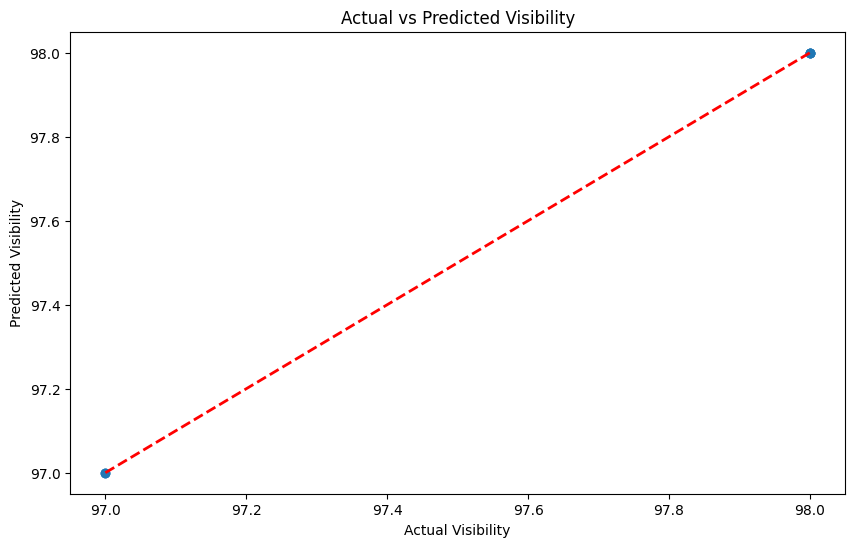

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/Users/paru/Documents/climate_change_project/data/Marine_CSV_sample.csv')  # Replace with your dataset path

# Convert 'Time of Observation' to datetime
df['Time of Observation'] = pd.to_datetime(df['Time of Observation'])

# Extract time features (hour, day, etc.)
df['Hour'] = df['Time of Observation'].dt.hour
df['Day'] = df['Time of Observation'].dt.day
df['Month'] = df['Time of Observation'].dt.month

# Drop non-numeric columns for processing
non_numeric_columns = ['Identification', 'Time of Observation']
df_numeric = df.drop(columns=non_numeric_columns)

# Convert to numeric, forcing errors to NaN
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Fill missing values in numeric columns
df_numeric.fillna(df_numeric.median(), inplace=True)

# Define features and target
features = df_numeric[['Latitude', 'Longitude', 'Hour', 'Day', 'Month', 'Visibility', 'Wind Direction', 'Wind Speed']]
# Assume we are predicting 'Visibility' for this example
target = df_numeric['Visibility']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Visibility')
plt.xlabel('Actual Visibility')
plt.ylabel('Predicted Visibility')
plt.show()
